# _ ECE WATERLOO ASSIGNMENT _

In [31]:
# Import libaries
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [15,18]
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np

_ Read modified csv file _

In [32]:
df = pd.read_csv('Data.csv')

In [33]:
df = df[df.t != 0]

In [34]:
df.head()

,t,x,y,x_out,y_out
1,1,0.54378,0.20457,0.54378,0.204570
2,2,0.54378,0.20457,1.08760,0.311140
3,3,0.54378,0.20457,1.63140,0.319710
4,4,0.54378,0.20457,2.17510,0.230280
5,5,0.54378,0.20457,2.71890,0.042855


In [35]:
#Split the input and output from dataframe
xy_output = df[['x_out','y_out']].values
df = df.drop(['x_out','y_out'],1)
X = df.values

_ Features Transformation _

In [36]:
poly = PolynomialFeatures(4)
X =poly.fit_transform(X)

In [37]:
X[0]

array([ 1.        ,  1.        ,  0.54378   ,  0.20457   ,  1.        ,
        0.54378   ,  0.20457   ,  0.29569669,  0.11124107,  0.04184888,
        1.        ,  0.54378   ,  0.20457   ,  0.29569669,  0.11124107,
        0.04184888,  0.16079395,  0.06049067,  0.02275659,  0.00856103,
        1.        ,  0.54378   ,  0.20457   ,  0.29569669,  0.11124107,
        0.04184888,  0.16079395,  0.06049067,  0.02275659,  0.00856103,
        0.08743653,  0.03289362,  0.01237458,  0.00465531,  0.00175133])

Split data for training and test 

In [38]:
X_train, X_test, xy_pos_train, xy_pos_test = train_test_split(X, xy_output, test_size = 0.2, random_state = 5 )

# _ Apply Ridge Regression as our model_

In [39]:
Ridge_model_x = RidgeCV(alphas=(0.0001,0.001,0.01,0.1, 1.0, 10.0,100),cv = 5)
Ridge_model_x.fit(X_train,xy_pos_train[:,0])

RidgeCV(alphas=(0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100), cv=5,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [40]:
Ridge_model_y = RidgeCV(alphas=(0.0001,0.001,0.01,0.1, 1.0, 10.0,100),cv = 5)
Ridge_model_y.fit(X_train,xy_pos_train[:,1])

RidgeCV(alphas=(0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100), cv=5,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [41]:
print 'Coefficient for x with Ridge Regression:', Ridge_model_x.coef_
print 'Coefficient for y with Ridge Regression:', Ridge_model_y.coef_

Coefficient for x with Ridge Regression: [  0.00000000e+00  -5.75886226e-05  -1.78903443e-03  -5.05628154e-04
  -5.23021392e-06   1.00021492e+00   2.02888849e-04   2.29212048e-03
   4.61435714e-03  -6.48897797e-04   2.03871743e-07   5.39220770e-06
   4.66682401e-07  -3.83318743e-05  -5.23035126e-04  -1.00945502e-04
  -2.55770413e-03  -6.66375284e-04  -4.28820791e-03   1.19436758e-03
   4.53562197e-11  -8.79539829e-08  -1.10719354e-07  -1.06822100e-06
  -6.62614120e-07   1.27960537e-06  -1.04533716e-05   8.64355952e-05
   2.04419582e-04   3.48486083e-06   1.06531731e-03  -5.67153341e-04
   1.04808216e-03   9.32048433e-04  -3.83838847e-04]
Coefficient for y with Ridge Regression: [  0.00000000e+00   4.90397165e-02   7.61350822e-04   3.70583179e-05
  -4.89991180e-02  -1.28632261e-04   9.99920696e-01   4.70664573e-04
  -4.53532168e-03   1.79139045e-03  -1.08903576e-08  -2.09923060e-07
  -6.29572419e-07   1.47518863e-05   3.52018156e-04  -4.09302027e-05
  -6.03951132e-04   9.26168552e-04   

In [42]:
i = Ridge_model_x.predict(X_train)
o = Ridge_model_x.predict(X_test)
print 'Root Mean Square Error for In-Sample of x with Ridge Regression :', mean_squared_error(xy_pos_train[:,0], i)
print 'Root Mean Square Error for Out-Sample of x with Ridge Regression : ', mean_squared_error(xy_pos_test[:,0], o)

Root Mean Square Error for In-Sample of x with Ridge Regression : 4.37247291434e-08
Root Mean Square Error for Out-Sample of x with Ridge Regression :  4.27977852861e-08


In [43]:
i = Ridge_model_y.predict(X_train)
o = Ridge_model_y.predict(X_test)
print 'Root Mean Square Error for In-Sample of y with Ridge Regression ', mean_squared_error(xy_pos_train[:,1], i)
print 'Root Mean Square Error for Out-Sample of y with Ridge Regression: ', mean_squared_error(xy_pos_test[:,1], o)

Root Mean Square Error for In-Sample of y with Ridge Regression  5.41836696188e-08
Root Mean Square Error for Out-Sample of y with Ridge Regression:  6.47784260979e-08


# _Apply Lasso Regression as our model_#

In [44]:
Lasso_model_x = LassoCV(alphas=[0.000001,0.00001, 0.0001,0.001,0.01,0.1, 1.0, 10.0,100],cv = 5)
Lasso_model_x.fit(X_train,xy_pos_train[:,0])

LassoCV(alphas=[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100],
    copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [45]:
Lasso_model_y = LassoCV(alphas=[0.000001,0.00001, 0.0001,0.001,0.01,0.1, 1.0, 10.0,100],cv = 5)
Lasso_model_y.fit(X_train,xy_pos_train[:,1])

LassoCV(alphas=[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100],
    copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [46]:
print 'Coefficient for x with Lasso Regression:', Lasso_model_x.coef_
print 'Coefficient for y with Lasso Regression:', Lasso_model_y.coef_

Coefficient for x with Lasso Regression: [  0.00000000e+00   3.73060324e-02   3.72981910e-01  -6.36663882e-02
   3.36468988e-03   8.82805800e-01  -1.04495535e-01  -1.44399920e-01
   1.70918548e-01   3.76274855e-01  -8.09314838e-05   4.36641447e-03
  -8.27285595e-04   8.59874224e-02   3.16203164e-02   3.13139584e-02
  -1.92079700e-01  -2.06754365e-01  -3.11245187e-01   1.34142453e-03
   2.32263527e-06  -1.11637737e-05  -3.77967954e-05  -2.22667327e-03
  -1.37840946e-03   1.66128381e-04  -2.34326047e-02   1.18458573e-02
   2.57121535e-03   8.24232464e-03   1.26039261e-01   3.64171101e-02
   7.75429270e-02   4.78691489e-02  -9.95952778e-02]
Coefficient for y with Lasso Regression: [  0.00000000e+00  -5.61321513e-03  -8.42972776e-02   7.46374173e-01
  -3.07795175e-02   9.41046607e-02   6.69056556e-01  -8.61637214e-02
  -7.81256698e-01   3.88412378e-01  -6.44088503e-04  -1.08600700e-02
   5.65304686e-03  -1.55735099e-02   1.54810580e-01   1.15684097e-01
   2.87446626e-01  -1.92726759e-01  -

In [47]:
i = Lasso_model_x.predict(X_train)
o = Lasso_model_x.predict(X_test)
print 'Root Mean Square Error for In-Sample of x with Lasso Regression :', mean_squared_error(xy_pos_train[:,0], i)
print 'Root Mean Square Error for Out-Sample of x with Lasso Regression : ', mean_squared_error(xy_pos_test[:,0], o)

Root Mean Square Error for In-Sample of x with Lasso Regression : 0.00151117643239
Root Mean Square Error for Out-Sample of x with Lasso Regression :  0.00173509331661


In [48]:
i = Lasso_model_y.predict(X_train)
o = Lasso_model_y.predict(X_test)
print 'Root Mean Square Error for In-Sample of y with Lasso Regression :', mean_squared_error(xy_pos_train[:,1], i)
print 'Root Mean Square Error for Out-Sample of y with Lasso Regression : ', mean_squared_error(xy_pos_test[:,1], o)

Root Mean Square Error for In-Sample of y with Lasso Regression : 0.00877431861895
Root Mean Square Error for Out-Sample of y with Lasso Regression :  0.0096731736466


# _Predict the trajectory of a projectile launched at 45 degrees with an initial velocity of 10 m/s till it hits the ground or timeindex=100 whichever is earlier_

In [49]:
#Read the formatted output file
predict_df = pd.read_csv('out_45_10.csv')
predict_df.head()

,t,x,y
0,1,0.707107,0.658107
1,2,0.707107,0.658107
2,3,0.707107,0.658107
3,4,0.707107,0.658107
4,5,0.707107,0.658107


In [50]:
#Read the prepared ground truth
ground_truth = pd.read_csv('Ground_truth.csv')
X_truth = ground_truth['x'].values
Y_truth = ground_truth['y'].values
Y_truth_stop = Y_truth[Y_truth>=0]
X_truth_stop = X_truth[0:len(Y_truth_stop)]
ground_truth.head()


,x,y
0,0.70711,0.65811
1,1.41420,1.21820
2,2.12130,1.68030
3,2.82840,2.04440
4,3.53550,2.31050


In [51]:
X_input = poly.fit_transform(predict_df.values)

In [52]:
x_output_Ridge = Ridge_model_x.predict(X_input)
y_output_Ridge = Ridge_model_y.predict(X_input)
y_output_Ridge_stop = y_output_Ridge[y_output_Ridge>=0]
x_output_Ridge_stop = x_output_Ridge[0:len(y_output_Ridge_stop)]
print x_output_Ridge_stop
print y_output_Ridge_stop

[ 0.70717171  1.41428475  2.12139582  2.82850533  3.53561371  4.24272137
  4.94982873  5.6569362   6.36404422  7.07115321  7.77826358  8.48537576
  9.19249017  9.89960725]
[ 0.65808726  1.21819561  1.68030567  2.04441709  2.31052956  2.4786428
  2.54875653  2.52087054  2.3949846   2.17109852  1.84921215  1.42932535
  0.91143801  0.29555003]


In [53]:
x_output_Lasso = Lasso_model_x.predict(X_input)
y_output_Lasso = Lasso_model_y.predict(X_input)
_less_than_0= np.argmax(y_output_Lasso < 0)
print _less_than_0
y_output_Lasso_stop = y_output_Lasso[0:_less_than_0]
x_output_Lasso_stop = x_output_Lasso[0:_less_than_0]
print x_output_Lasso
print y_output_Lasso

14
[   0.7657445     1.44045352    2.12236414    2.81093354    3.5056746
    4.20615599    4.91200208    5.62289301    6.33856466    7.05880864
    7.78347232    8.51245879    9.24572692    9.98329129   10.72522224
   11.47164584   12.22274392   12.97875404   13.73996951   14.50673938
   15.27946845   16.05861725   16.84470206   17.63829491   18.44002357
   19.25057155   20.07067809   20.90113821   21.74280263   22.59657785
   23.46342609   24.34436531   25.24046924   26.15286733   27.08274478
   28.03134253   28.99995728   29.98994144   31.0027032    32.03970646
   33.1024709    34.1925719    35.31164062   36.46136395   37.64348452
   38.8598007    40.11216661   41.40249212   42.73274284   44.1049401
   45.521161     46.98353838   48.49426082   50.05557264   51.66977389
   53.3392204    55.06632371   56.85355111   58.70342565   60.61852611
   62.601487     64.6549986    66.78180692   68.98471372   71.26657648
   73.63030846   76.07887863   78.61531172   81.2426882    83.96414429
   86

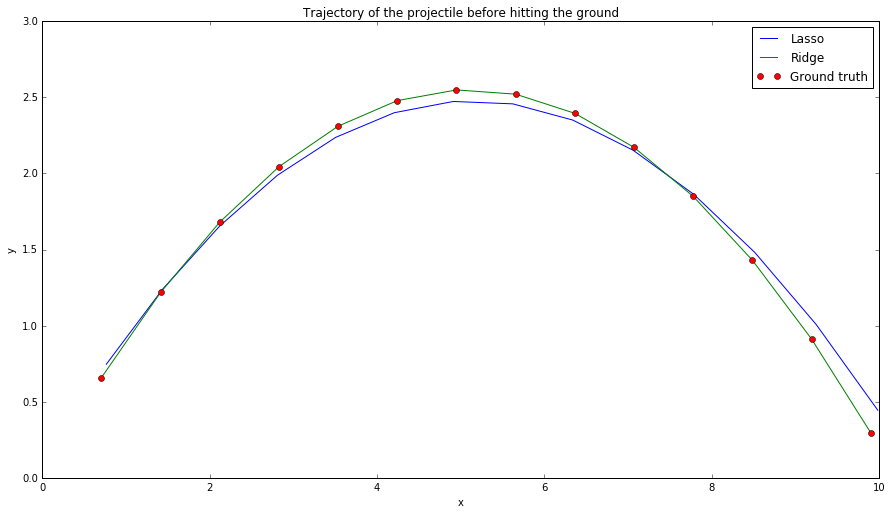

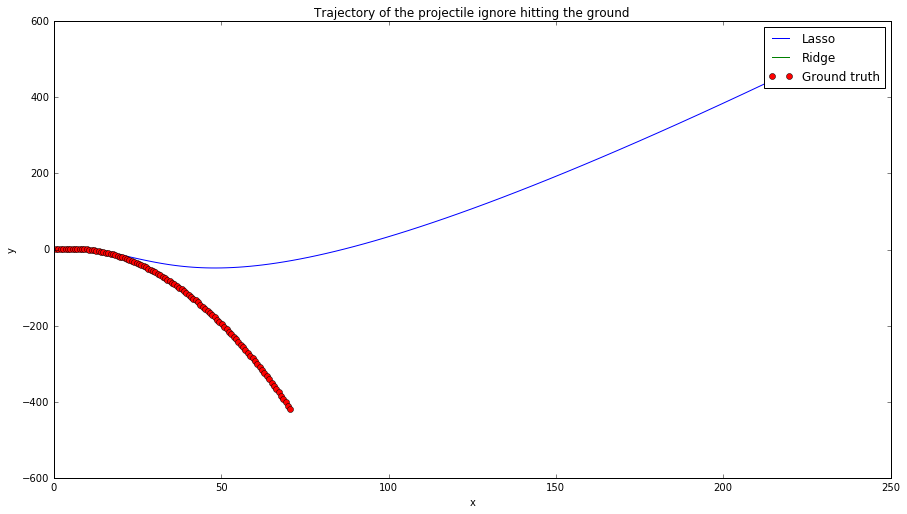

In [54]:
plt.subplot(2, 1, 1)
a0= plt.plot(x_output_Lasso_stop, y_output_Lasso_stop, label = 'Lasso')
a1= plt.plot(x_output_Ridge_stop, y_output_Ridge_stop, label = 'Ridge')
a2= plt.plot(X_truth_stop , Y_truth_stop,'o', label = 'Ground truth')
plt.legend()
plt.title('Trajectory of the projectile before hitting the ground')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.subplot(2, 1, 2)
a0= plt.plot(x_output_Lasso, y_output_Lasso, label = 'Lasso')
a1 = plt.plot(x_output_Ridge, y_output_Ridge, label = 'Ridge')
a2 = plt.plot(X_truth , Y_truth,'o', label = 'Ground truth')
plt.legend()
plt.title('Trajectory of the projectile ignore hitting the ground')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
plt.show()

# _Output csv file for submission (Ridge Regression only)_#

In [55]:
predict_df['x_out'] = x_output_Ridge
predict_df['y_out'] = y_output_Ridge
tem_df = pd.DataFrame([[0,0,0,0,0]], columns=predict_df.columns)

In [56]:
tem_df = tem_df.append(predict_df,ignore_index=True)
out_df = tem_df[tem_df['y_out'] >= 0]

In [57]:
out_df = out_df[['t','x_out','y_out']]
out_df.columns = ['[time_collect]', '[x]', '[y]']

In [58]:
out_df

,[time_collect],[x],[y]
0,0,0.000000,0.000000
1,1,0.707172,0.658087
2,2,1.414285,1.218196
3,3,2.121396,1.680306
4,4,2.828505,2.044417
5,5,3.535614,2.310530
6,6,4.242721,2.478643
7,7,4.949829,2.548757
8,8,5.656936,2.520871
9,9,6.364044,2.394985


In [59]:
out_df.to_csv('submission.csv', index= False)